# DFT Question for the Exam
# Verifying DFT by hand and by OpenCV
<b>Ulvi Bajarani</b>

In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib notebook
np.set_printoptions(formatter={'complex_kind': '{: .3f}'.format})

In [22]:
f = np.array([1, 1, 1, 0, 0, 0, 0, 0], dtype=np.float32)

In [23]:
f

array([1., 1., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
F = cv2.dft(f.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)

In [25]:
F

array([[[ 3.        ,  0.        ]],

       [[ 1.7071068 , -1.7071068 ]],

       [[ 0.        , -1.        ]],

       [[ 0.29289323,  0.29289323]],

       [[ 1.        ,  0.        ]],

       [[ 0.29289323, -0.29289323]],

       [[ 0.        ,  1.        ]],

       [[ 1.7071068 ,  1.7071068 ]]], dtype=float32)

In [30]:
F_Complex = np.vectorize(complex)(F[:,:,0], F[:,:,1])
F_Complex

array([[ 3.000+0.000j],
       [ 1.707-1.707j],
       [ 0.000-1.000j],
       [ 0.293+0.293j],
       [ 1.000+0.000j],
       [ 0.293-0.293j],
       [ 0.000+1.000j],
       [ 1.707+1.707j]])

In [31]:
Magnitude = np.absolute(F_Complex)
Magnitude

array([[3.        ],
       [2.41421363],
       [1.        ],
       [0.41421358],
       [1.        ],
       [0.41421358],
       [1.        ],
       [2.41421363]])

In [33]:
Angle = np.angle(F_Complex)
Angle

array([[ 0.        ],
       [-0.78539816],
       [-1.57079633],
       [ 0.78539816],
       [ 0.        ],
       [-0.78539816],
       [ 1.57079633],
       [ 0.78539816]])

In [36]:
angle_degrees = Angle*180/np.pi
angle_degrees

array([[  0.],
       [-45.],
       [-90.],
       [ 45.],
       [  0.],
       [-45.],
       [ 90.],
       [ 45.]])

<IPython.core.display.Javascript object>


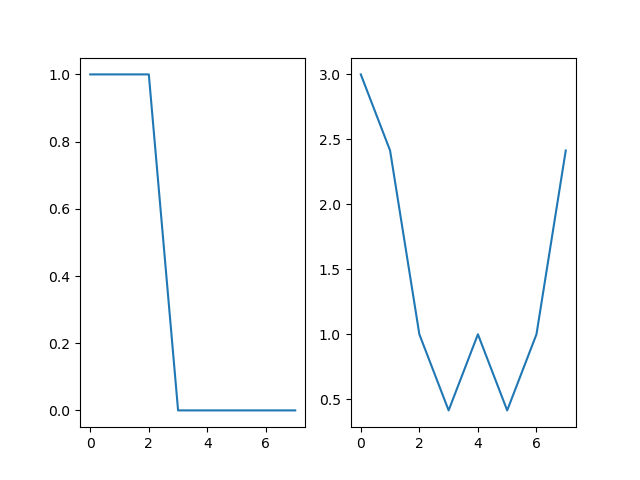

In [38]:
plt.subplot(121)
plt.plot(f)
plt.subplot(122)
plt.plot(Magnitude)

In [50]:
N=8
k=0
exp_0 = np.array([np.exp((-2*np.pi*(1j)/N)*k*x) for x in np.arange(8)])
F0 = np.dot(exp_0, f)
F0 = np.around(F0, 3)
F0

(3+0j)

In [60]:
for k in range(8):
    exp = np.array([np.exp((-2*np.pi*(1j)/N)*k*x) for x in np.arange(N)])
    F_print = np.dot(exp, f)
    F_print = np.around(F_print, 3)
    print(f' index is i={k} F{k} is {F_print}')

 index is i=0 F0 is (3+0j)
 index is i=1 F1 is (1.707-1.707j)
 index is i=2 F2 is -1j
 index is i=3 F3 is (0.293+0.293j)
 index is i=4 F4 is (1+0j)
 index is i=5 F5 is (0.293-0.293j)
 index is i=6 F6 is (-0+1j)
 index is i=7 F7 is (1.707+1.707j)
